In [1]:
#Load modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook
%matplotlib notebook

In [3]:
#Load data
file_path = '/home/NearingLab/data/camels_data/basin_dataset_public_v1p2/basin_mean_forcing/daymet/09/05062500_lump_cida_forcing_leap.txt'
df = pd.read_csv(file_path, sep = '\s+', header = 3)
#plt.plot(df['prcp(mm/day)'])
prcp = df['prcp(mm/day)'].values

In [4]:
file_path2 = '/home/NearingLab/data/camels_data/basin_dataset_public_v1p2/usgs_streamflow/09/05062500_streamflow_qc.txt'
col_names = ['basin', 'Year', 'Mnth', 'Day', 'QObs', 'flag']
df2 = pd.read_csv(file_path2, sep = '\s+', header = None, names = col_names)

In [5]:
#Define model
a = 0.2
b = 0.75
c = 0.01
groundwater = np.full(prcp.shape,0)
streamflow = np.full(prcp.shape,np.nan)
for t in range(1, prcp.shape[0]):
    streamflow[t] = (1-a-b)*prcp[t]+(c*groundwater[t-1])
    groundwater[t] = (1-c)*groundwater[t-1]+(a*prcp[t])

<IPython.core.display.Javascript object>


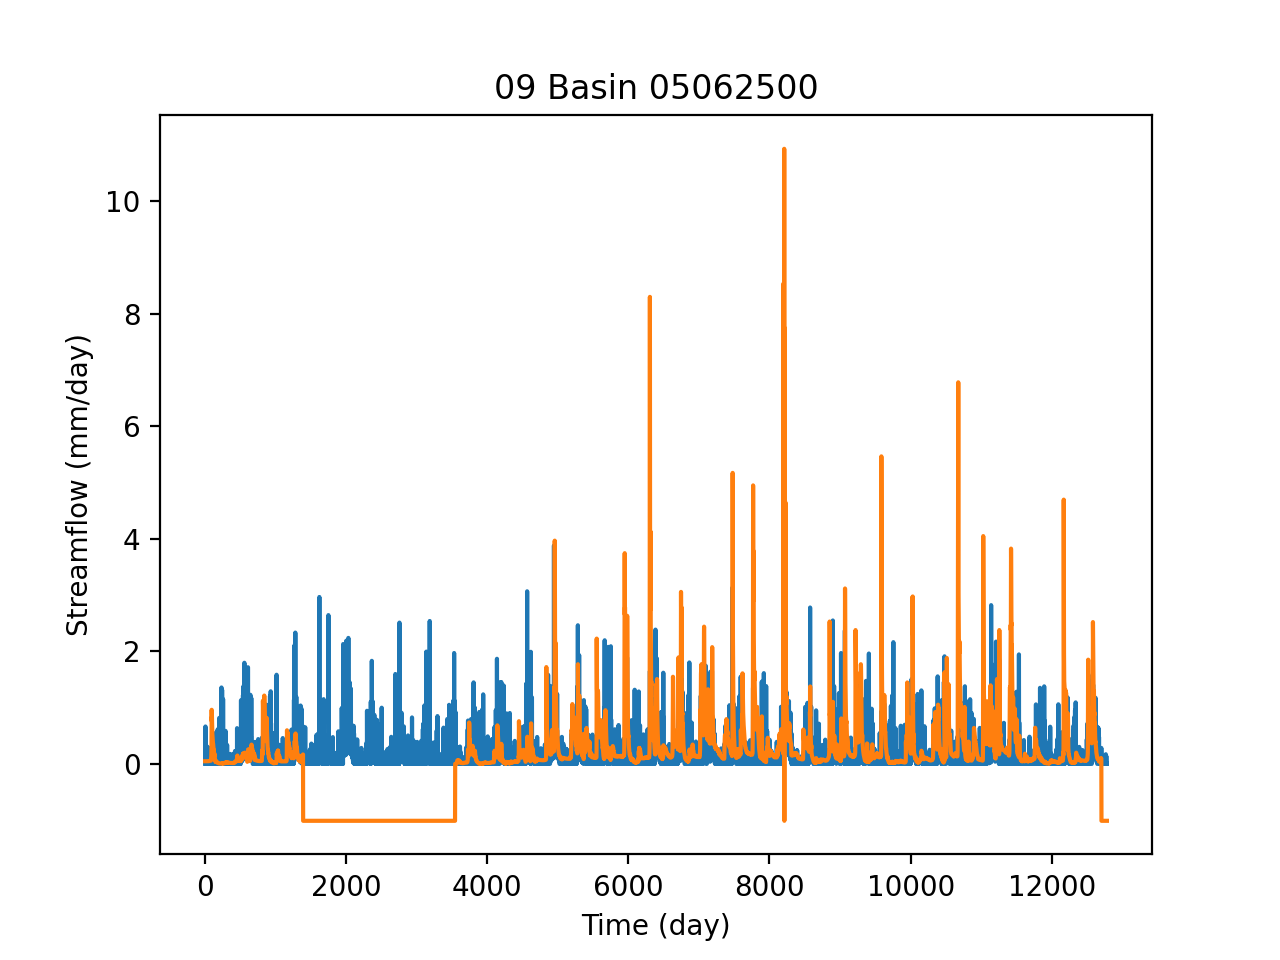

Text(0.5, 1.0, '09 Basin 05062500')

In [6]:
fig = plt.figure()
plt.plot(streamflow)
plt.ylabel('Streamflow (mm/day)')
plt.xlabel('Time (day)')
plt.title('09 Basin 05062500')

In [7]:
df2['QObs_conv'] = df2['QObs'] * ((304.8)**3) * 86400 / 2418014854000000
plt.plot(df2['QObs_conv'])
plt.ylabel('Streamflow (mm/day)')
plt.xlabel('Time (day)')
plt.title('09 Basin 05062500')

Text(0.5, 1.0, '09 Basin 05062500')